# Two Coupled Oscillators, Different Spring Constants

### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sympy import *

### Make plots big, do fancy math printing

In [2]:
dpi = 180
mpl.rcParams['figure.dpi'] = dpi
init_printing()

## Find eigenvalues

#### Define constants, make matrix representing eigenvalue problem

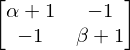

In [3]:
alpha, beta = symbols('alpha beta')
L = Matrix([[alpha + 1, -1      ],
            [-1       , beta + 1]])
L

#### Diagonalize matrix to find eigenvalues

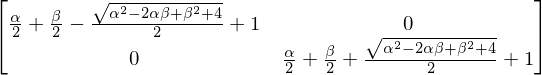

In [4]:
P, D = L.diagonalize()
D

#### Use corresponding unitary matrix to get eigenvectors

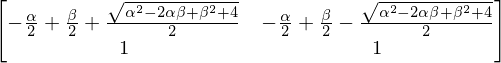

In [5]:
P

#### Make sure they are eigenvectors and eigenvalues

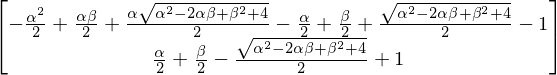

In [9]:
simplify(expand(L*P[:, 0]))

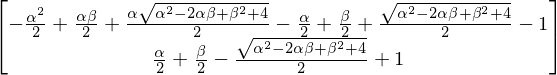

In [10]:
simplify(expand(D[0, 0]*P[:, 0]))

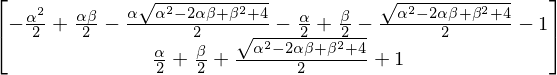

In [11]:
simplify(expand(L*P[:, 1]))

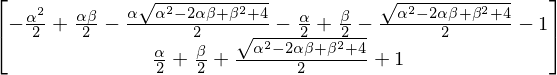

In [12]:
simplify(expand(D[1, 1]*P[:, 1]))

#### Find frequencies

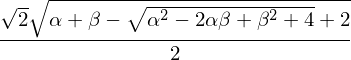

In [5]:
simplify(sqrt(D[0, 0]))

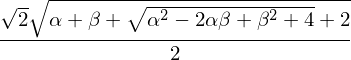

In [6]:
simplify(sqrt(D[1, 1]))

## Compare resonant frequencies to characteristic frequencies

#### Make functions representing coupled frequencies

In [7]:
def omega1(a, b):
    return np.sqrt(2)/2 * np.sqrt(a + b - np.sqrt(a**2 - 2*a*b + b**2 + 4) + 2)
    
def omega2(a, b):
    return np.sqrt(2)/2 * np.sqrt(a + b + np.sqrt(a**2 - 2*a*b + b**2 + 4) + 2)

#### Compare $\omega_1$ to $\overline{\xi}_1 = \sqrt{1 + \alpha}$ as $\alpha$ ranges over several values for for various values of $\beta$

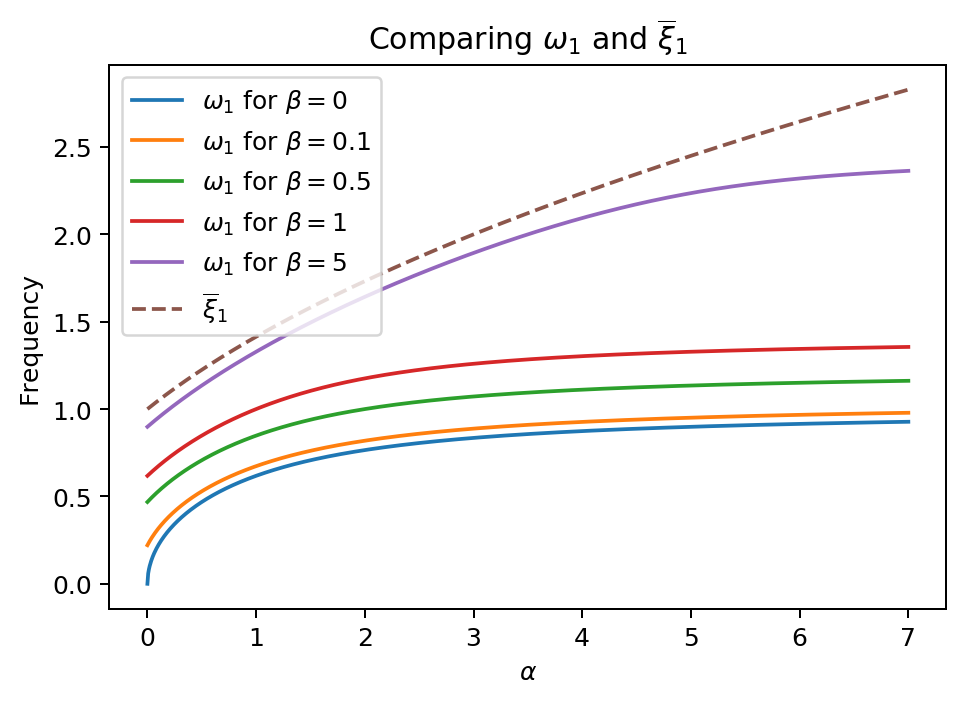

In [14]:
fig, ax = plt.subplots(1)

alpha = np.linspace(0, 7, num=1000)
betas = [0, 0.1, 0.5, 1, 5]

for beta in betas:
    omega_label = r'$\omega_1$ for $\beta = $' + str(beta)
    ax.plot(alpha, omega1(alpha, beta), label=omega_label)

xi_label = r'$\overline{\xi}_1$'
ax.plot(alpha, np.sqrt(1 + alpha), label=xi_label, linestyle='--')

ax.legend()
title = r'Comparing $\omega_1$ and $\overline{\xi}_1$'
ax.set_title(title)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel("Frequency")

filename = "12_1_Figures\\Omega1_vs_Xi1.png"
fig.savefig(filename)

#### Compare $\omega_2$ to $\overline{\xi}_1 = \sqrt{1 + \alpha}$ as $\alpha$ ranges over several values for for various values of $\beta$

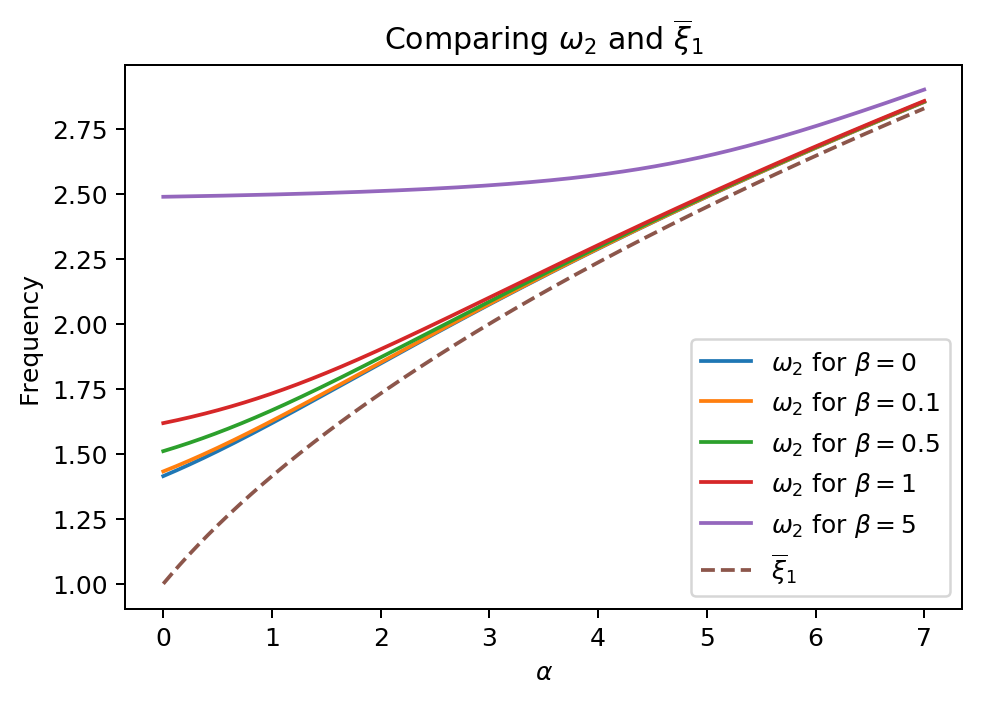

In [18]:
fig, ax = plt.subplots(1)

alpha = np.linspace(0, 7, num=1000)
betas = [0, 0.1, 0.5, 1, 5]

for beta in betas:
    omega_label = r'$\omega_2$ for $\beta = $' + str(beta)
    ax.plot(alpha, omega2(alpha, beta), label=omega_label)

xi_label = r'$\overline{\xi}_1$'
ax.plot(alpha, np.sqrt(1 + alpha), label=xi_label, linestyle='--')

ax.legend()
title = r'Comparing $\omega_2$ and $\overline{\xi}_1$'
ax.set_title(title)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel("Frequency")

filename = "12_1_Figures\\Omega2_vs_Xi1.png"
fig.savefig(filename)